In [5]:
import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, BatchNormalization
from keras.layers import Conv2D, MaxPooling2D
import os

In [6]:
num_classes = 3
img_rows, img_cols = 48,48
batch_size = 128

train_data_dir = 'NHS_DataSet/train'
validation_data_dir = 'NHS_DataSet/validation'

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    zoom_range=0.3,
    width_shift_range=0.4,
    height_shift_range=0.4,
    horizontal_flip=True,
    fill_mode='nearest')

validation_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
                    train_data_dir,
                    color_mode='grayscale',
                    target_size=(img_rows,img_cols),
                    batch_size=batch_size,
                    class_mode='categorical',
                    shuffle=True)

validation_generator = validation_datagen.flow_from_directory(
                        validation_data_dir,
                        color_mode='grayscale',
                        target_size=(img_rows,img_cols),
                        batch_size=batch_size,
                        class_mode='categorical',
                        shuffle=True)

model = Sequential()

model.add(Conv2D(32,(3,3),padding='same', kernel_initializer='he_normal', activation='elu', input_shape=(img_rows,img_cols,1)))
model.add(BatchNormalization())
model.add(Conv2D(32,(3,3),padding='same', kernel_initializer='he_normal', activation='elu', input_shape=(img_rows,img_cols,1)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.1))

model.add(Conv2D(64,(3,3),padding='same', activation='elu', kernel_initializer='he_normal'))
model.add(BatchNormalization())
model.add(Conv2D(64,(3,3),padding='same', activation='elu', kernel_initializer='he_normal'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.1))

model.add(Conv2D(128,(3,3),padding='same', activation='elu', kernel_initializer='he_normal'))
model.add(BatchNormalization())
model.add(Conv2D(128,(3,3),padding='same', activation='elu', kernel_initializer='he_normal'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.1))

model.add(Conv2D(256,(3,3),padding='same', activation='elu', kernel_initializer='he_normal'))
model.add(BatchNormalization())
model.add(Conv2D(256,(3,3),padding='same', activation='elu', kernel_initializer='he_normal'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.1))

model.add(Flatten())
model.add(Dense(64,activation='elu',kernel_initializer='he_normal'))
model.add(BatchNormalization())
model.add(Dropout(0.4))

model.add(Dense(64,activation='elu',kernel_initializer='he_normal'))
model.add(BatchNormalization())
model.add(Dropout(0.4))

model.add(Dense(num_classes, kernel_initializer='he_normal', activation='softmax'))

print(model.summary())

Found 15421 images belonging to 3 classes.
Found 1921 images belonging to 3 classes.
Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_17 (Conv2D)           (None, 48, 48, 32)        320       
_________________________________________________________________
batch_normalization_21 (Batc (None, 48, 48, 32)        128       
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 48, 48, 32)        9248      
_________________________________________________________________
batch_normalization_22 (Batc (None, 48, 48, 32)        128       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 24, 24, 32)        0         
_________________________________________________________________
dropout_13 (Dropout)         (None, 24, 24, 32)        0         
___________________________________

In [7]:
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau

checkpoint = ModelCheckpoint(
    'NHS_vgg.h5',
    monitor='val_accuracy',
    mode='max',
    save_best_only=True,
    verbose=1)

reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.2,
    patience=3,
    verbose=1,
    min_delta=0.0001)

callbacks = [checkpoint, reduce_lr]

model.compile(loss='categorical_crossentropy',
              optimizer = Adam(lr=0.003),
              metrics=['accuracy'])

nb_train_samples = 15421
nb_validation_samples = 1921
epochs = 10

history = model.fit_generator(
    train_generator,
    steps_per_epoch=nb_train_samples//batch_size,
    epochs = epochs,
    callbacks = callbacks,
    validation_data = validation_generator,
    validation_steps = nb_validation_samples//batch_size)

Epoch 1/10
120/120 [==============================] - 914s 8s/step - loss: 1.2345 - accuracy: 0.4125 - val_loss: 1.0893 - val_accuracy: 0.4385

Epoch 00001: val_accuracy improved from -inf to 0.43854, saving model to NHS2_vgg.h5
Epoch 2/10
120/120 [==============================] - 741s 6s/step - loss: 1.0390 - accuracy: 0.4640 - val_loss: 1.0608 - val_accuracy: 0.4741

Epoch 00002: val_accuracy improved from 0.43854 to 0.47407, saving model to NHS2_vgg.h5
Epoch 3/10
120/120 [==============================] - 718s 6s/step - loss: 1.0062 - accuracy: 0.4805 - val_loss: 1.0660 - val_accuracy: 0.4495

Epoch 00003: val_accuracy did not improve from 0.47407
Epoch 4/10
120/120 [==============================] - 423s 4s/step - loss: 0.9559 - accuracy: 0.5192 - val_loss: 1.0258 - val_accuracy: 0.5817

Epoch 00004: val_accuracy improved from 0.47407 to 0.58171, saving model to NHS2_vgg.h5
Epoch 5/10
120/120 [==============================] - 382s 3s/step - loss: 0.8936 - accuracy: 0.5701 - val_l

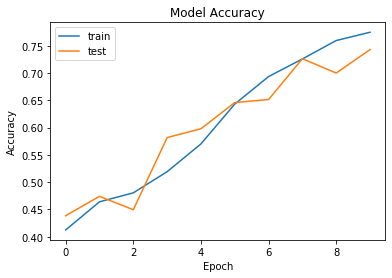

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()